# Deep Learning Basic K-Class Classification: Clothing Image Classification

This [guide](https://www.tensorflow.org/tutorials/keras/classification) trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow. This notebook I cover
- **Environment Initiation** I start every data science project or machine learning practice by initiating environment and importing the required Python modules.
- **Data Collection and Cleanup** Then I load the data and process the data in a form that is appropriate for the machine.
- **Architecture Design** The major part is to design a deep learning architecture. One can always start from vanilla model and then add in different functions.
- **Performance Evaluation** Machine learning has to be properly carried out through training and testing. This is the part where performance evaluation is very important because it tells us whether to re-design the architecture or to move on to developmental phase.
- **Software Development / Product Management** Every data science or machine learning practice I land on software development. I almost always soft code and attempt to pack all that is scalable into a product for potential future usage.

## Environment Initiation

Let us import all the required modules.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\eagle\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


## Data Collection and Cleanup

Let us get the data and make sure the data is processed and ready to go.

Import the Fashion MNIST dataset:

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
![](../figs/fashion-mnist-sprite.png)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

The *train_images* and *train_labels* arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.
- The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

| Label | Class |
| ---------- | ---------- |
| 0	| T-shirt/top |
| 1	| Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat |
| 5	| Sandal |
| 6	| Shirt |
| 7	| Sneaker |
| 8	| Bag |
| 9	| Ankle boot |

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [6]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

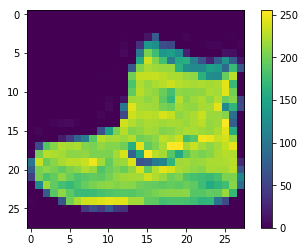

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

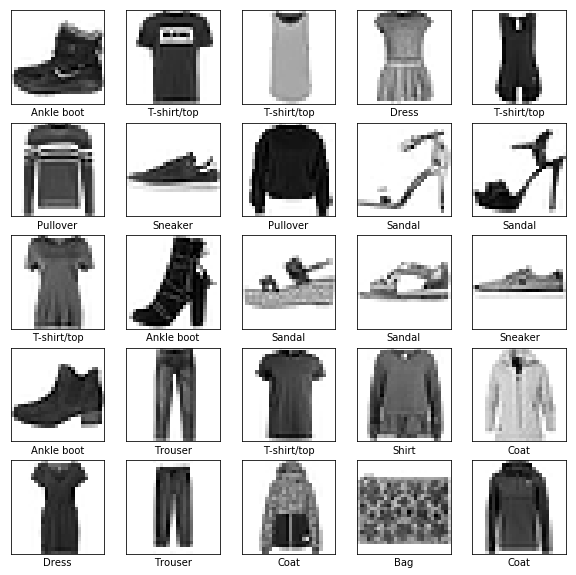

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Architecture Design

Let us design the architecture! The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as *tf.keras.layers.Dense*, have parameters that are learned during training.

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.5056 - accuracy: 0.8223
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3801 - accuracy: 0.8626
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3386 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3148 - accuracy: 0.8838
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2965 - accuracy: 0.8907
Epoch 6/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2799 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2687 - accuracy: 0.9012
Epoch 8/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2596 - accuracy: 0.9029
Epoch 9/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2488 - accuracy: 0.9072
Epoc

## Performance Evaluation

Let us check out the performance by computing 10-class classification accuracy.

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2357 - accuracy: 0.8837

Test accuracy: 0.8837


## Predictions

Let us check out a few images and see what they look like and if they are performed well.

In [14]:
predictions = model.predict(test_images)
predictions[0]

array([3.1675063e-07, 7.5388062e-10, 8.1847723e-08, 2.3475398e-07,
       1.3964062e-08, 3.9736199e-04, 2.5914218e-07, 1.2604838e-02,
       4.7131184e-08, 9.8699689e-01], dtype=float32)

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
pd.DataFrame(confusion)

,0,1,2,3,4,5,6,7,8,9
0,822,0,4,28,5,1,132,0,8,0
1,4,973,0,18,2,0,2,0,1,0
2,18,0,731,13,133,0,104,0,1,0
3,18,3,5,917,13,0,38,0,5,1
4,0,0,59,51,803,0,84,0,3,0
5,0,0,0,0,0,962,0,22,1,15
6,106,0,54,28,65,0,737,0,10,0
7,0,0,0,0,0,9,0,955,0,36
8,6,0,1,4,2,1,9,7,970,0
9,0,0,0,0,0,7,1,25,0,967


Notice that in the architecture the last dense layer has 10 nodes. This means that we need to check the largest value from the nodes to determine which class it is classified in.

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

So we did it correctly! 

We can code a function to check out the performance for each image.

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

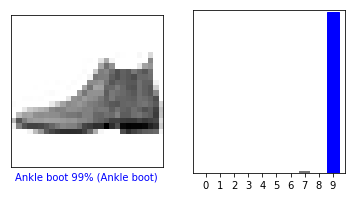

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

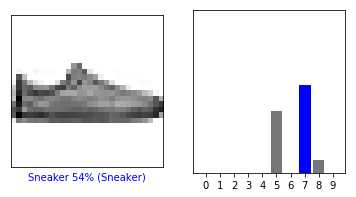

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

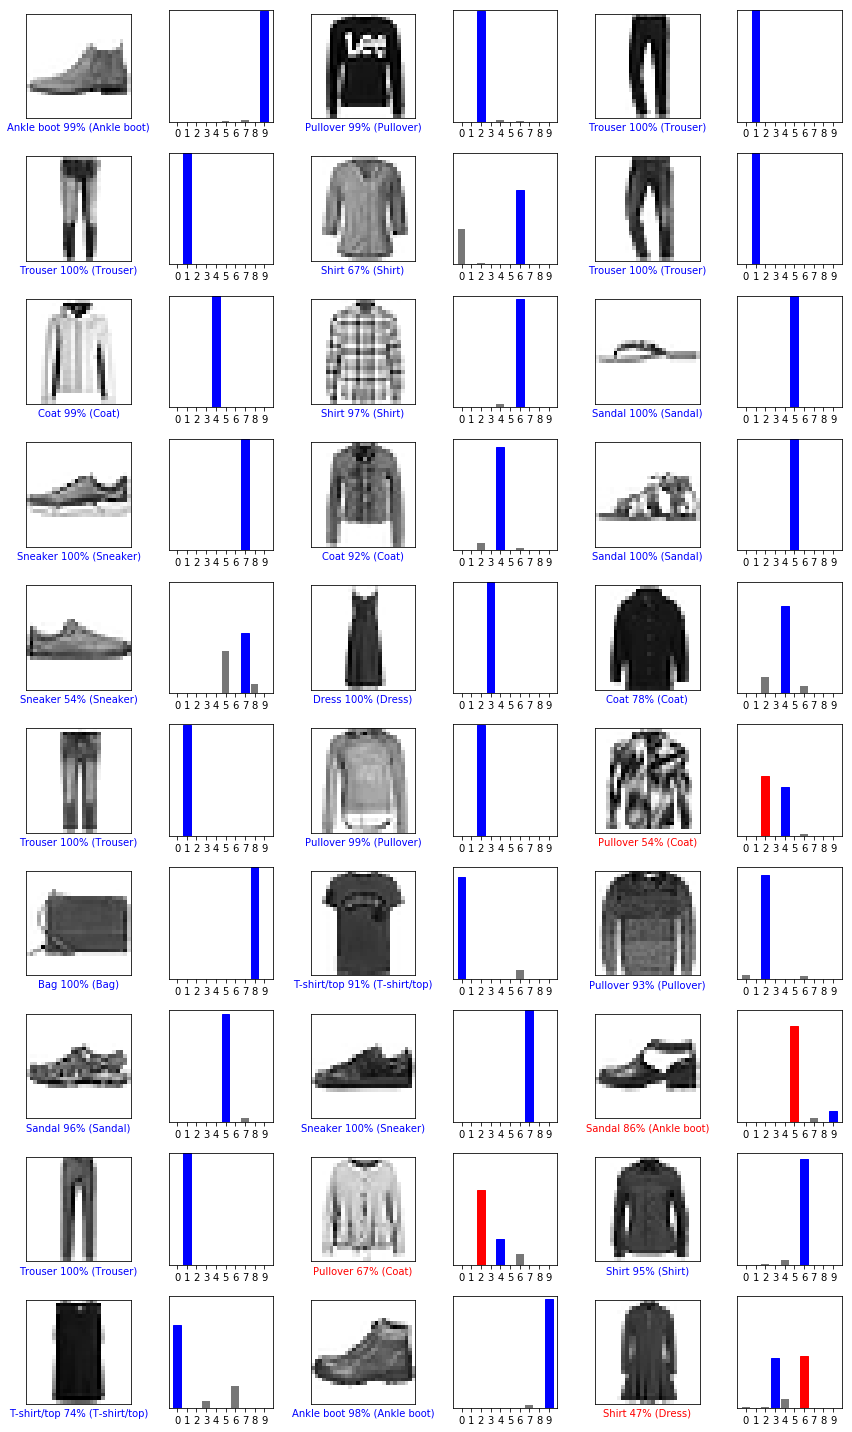

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Software Development

Every data science project has two phases. Phase I is about end-to-end research and select the most optimal machine learning procedure. Phase II is about delivering a software product to consumer and clients so that the python codes can be called and there is no need to redo everything that has already been done.

In [84]:
# Define function
def DL_NN_Classification(train_images, train_labels, test_images, test_labels, 
                         shape_width=28, shape_height=28,
                         l1_act='relu', l2_act='relu', l3_act='softmax',
                         layer1size=128, layer2size=64, layer3size=10,
                         num_rows = 10, num_cols = 3):
    """ Code Starts Here"""
    # TensorFlow and tf.keras
    import tensorflow as tf
    from tensorflow import keras

    # Helper libraries
    import numpy as np
    import matplotlib.pyplot as plt

    print(tf.__version__)
    
    # Normalize
    train_images = train_images / float(shape_width * shape_height)
    test_images = test_images / float(shape_width * shape_height)

    # Model
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(shape_width, shape_height)),
    keras.layers.Dense(layer1size, activation=l1_act),
    keras.layers.Dense(layer2size, activation=l2_act),        
    keras.layers.Dense(layer3size, activation=l3_act) ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=10)
    
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    
    # Prediction
    predictions = model.predict(test_images)

    # Performance
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import pandas as pd
    confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
    confusion = pd.DataFrame(confusion)
    
    # Visualization
    def plot_image(i, predictions_array, true_label, img):
      predictions_array, true_label, img = predictions_array, true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
        color = 'blue'
      else:
        color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

    def plot_value_array(i, predictions_array, true_label):
      predictions_array, true_label = predictions_array, true_label[i]
      plt.grid(False)
      plt.xticks(range(layer3size))
      plt.yticks([])
      thisplot = plt.bar(range(layer3size), predictions_array, color="#777777")
      plt.ylim([0, 1])
      predicted_label = np.argmax(predictions_array)

      thisplot[predicted_label].set_color('red')
      thisplot[true_label].set_color('blue')
    
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()
    """ Code Ends Here"""
    
    # Output
    return {
        'Data': [train_images, train_labels, test_images, test_labels],
        'Shape': [train_images.shape, len(train_labels), test_images.shape, len(test_labels)],
        'Model Fitting': model,
        'Performance': {
            'test_loss': test_loss, 
            'test_acc': test_acc, 
            'confusion': confusion
        },
    }
# End of function

We have the product coded! Let us try it out.

2.0.0
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 1.1082 - accuracy: 0.5856
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.7105 - accuracy: 0.7404
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6222 - accuracy: 0.7709
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5788 - accuracy: 0.7896
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5503 - accuracy: 0.8025
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.5287 - accuracy: 0.8112
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5104 - accuracy: 0.8186
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4939 - accuracy: 0.8233
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4783 - accuracy: 0.8295
Epoch 10

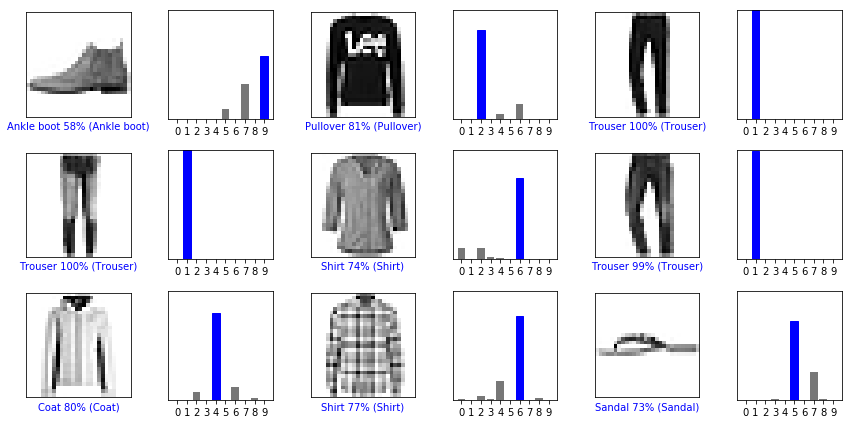

In [85]:
testresult = DL_NN_Classification(
    train_images, train_labels, test_images, test_labels, 
    #shape_width=28, shape_height=28,
    l1_act='relu', l2_act='relu', l3_act='softmax',
    layer1size=128, layer2size=64, layer3size=10,
    num_rows = 3, num_cols = 3)

In [86]:
fitted_model = testresult['Model Fitting']
fitted_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [87]:
testresult['Performance']['confusion']

,0,1,2,3,4,5,6,7,8,9
0,759,4,8,96,4,6,103,0,20,0
1,0,939,10,42,5,0,2,0,2,0
2,16,2,640,13,215,0,108,0,6,0
3,25,10,3,872,39,0,40,0,11,0
4,0,1,62,38,801,0,91,0,7,0
5,0,0,0,1,0,872,0,86,6,35
6,145,2,76,71,134,2,533,0,37,0
7,0,0,0,0,0,22,0,944,0,34
8,2,1,3,9,3,8,24,4,945,1
9,0,0,0,0,0,16,0,58,1,925


In [88]:
testresult['Performance']['test_acc']

0.823

Let us code an even more general function.

In [237]:
# Define function
def DL_NN_Classification(X_train, y_train, X_test, y_test, 
                         l1_act='relu', l2_act='relu', l3_act='softmax',
                         layer1size=128, layer2size=64, layer3size=2,
                         num_of_epochs=10):
    
    """ Code Starts Here"""
    # TensorFlow and tf.keras
    import tensorflow as tf
    from tensorflow import keras

    # Helper libraries
    import numpy as np
    import matplotlib.pyplot as plt

    print(tf.__version__)
    
    # Normalize
    # Helper Function
    def helpNormalize(X):
        return (X - X.mean()) / np.std(X)
    
    X_train = X_train.apply(helpNormalize, axis=1)
    X_test = X_test.apply(helpNormalize, axis=1)

    # Model
    model = tf.keras.Sequential([
        keras.layers.Dense(units=layer1size, input_shape=[X_train.shape[1]]),
        keras.layers.Dense(units=layer2size, activation=l2_act),
        keras.layers.Dense(units=layer3size, activation=l3_act)
    ])
    
    # Compile
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Model Fitting
    model.fit(X_train, y_train, epochs=num_of_epochs)
    
    # Prediction
    predictions = model.predict(X_test)

    # Performance
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import pandas as pd
    confusion = confusion_matrix(y_test, np.argmax(predictions, axis=1))
    confusion = pd.DataFrame(confusion)
    test_acc = sum(np.diag(confusion)) / sum(sum(np.array(confusion)))
    """ Code Ends Here"""
    
    # Output
    return {
        'Data': [train_images, train_labels, test_images, test_labels],
        'Shape': [train_images.shape, len(train_labels), test_images.shape, len(test_labels)],
        'Model Fitting': model,
        'Performance': {
            'test_loss': test_loss, 
            'test_acc': test_acc, 
            'confusion': confusion
        },
    }
# End of function

Let us try a different data set.

In [203]:
house_sales = pd.read_csv('../data/kc_house_data.csv')
house_sales.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [204]:
house_sales = house_sales.drop(['id', 'zipcode', 'lat', 'long', 'date'], axis=1)
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [205]:
X_all = house_sales.drop('price', axis=1)
y = np.log(house_sales.price)
y_binary = (y > y.mean()).astype(int)
y_binary

0        0
1        1
2        0
3        1
4        1
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: price, Length: 21613, dtype: int32

In [206]:
X_all.head(3), y_binary.head(3)

(   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0         3       1.00         1180      5650     1.0           0     0   
 1         3       2.25         2570      7242     2.0           0     0   
 2         2       1.00          770     10000     1.0           0     0   
 
    condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
 0          3      7        1180              0      1955             0   
 1          3      7        2170            400      1951          1991   
 2          3      6         770              0      1933             0   
 
    sqft_living15  sqft_lot15  
 0           1340        5650  
 1           1690        7639  
 2           2720        8062  , 0    0
 1    1
 2    0
 Name: price, dtype: int32)

In [207]:
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_binary, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train)

(15129, 15) (6484, 15)
1468     0
15590    0
18552    1
10535    0
1069     1
        ..
13123    1
19648    0
9845     0
10799    0
2732     1
Name: price, Length: 15129, dtype: int32


In [239]:
testresult = DL_NN_Classification(X_train, y_train, X_test, y_test, 
                         l1_act='relu', l2_act='relu', l3_act='softmax',
                         layer1size=128, layer2size=64, layer3size=2,
                         num_of_epochs=50)

2.0.0
Train on 15129 samples
Epoch 1/50
15129/15129 [==============================] - 0s 28us/sample - loss: 0.5636 - accuracy: 0.6992
Epoch 2/50
15129/15129 [==============================] - 0s 25us/sample - loss: 0.5050 - accuracy: 0.7422
Epoch 3/50
15129/15129 [==============================] - 0s 26us/sample - loss: 0.4899 - accuracy: 0.7511
Epoch 4/50
15129/15129 [==============================] - 0s 25us/sample - loss: 0.4819 - accuracy: 0.7531
Epoch 5/50
15129/15129 [==============================] - 0s 26us/sample - loss: 0.4795 - accuracy: 0.7586
Epoch 6/50
15129/15129 [==============================] - 0s 26us/sample - loss: 0.4758 - accuracy: 0.7613
Epoch 7/50
15129/15129 [==============================] - 0s 25us/sample - loss: 0.4735 - accuracy: 0.7646
Epoch 8/50
15129/15129 [==============================] - 0s 26us/sample - loss: 0.4675 - accuracy: 0.7713
Epoch 9/50
15129/15129 [==============================] - 0s 26us/sample - loss: 0.4731 - accuracy: 0.7621
Epoch 10

In [240]:
testresult['Performance']['confusion']

,0,1
0,2767,648
1,789,2280


In [241]:
testresult['Performance']['test_acc']

0.7783775447254782